In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import _cccx

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

## Generate Quantum cheque state 

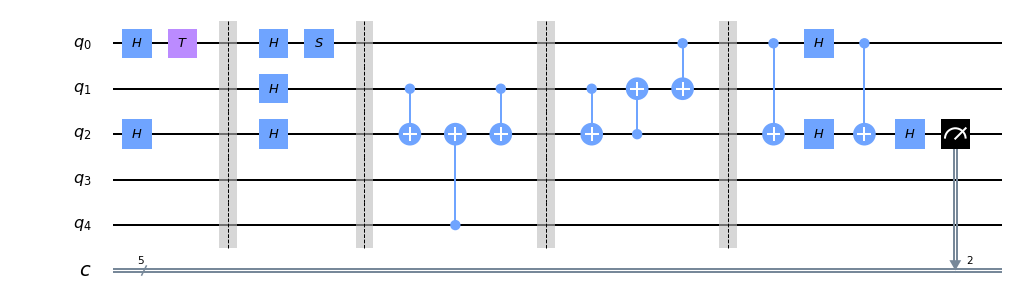

In [15]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister (5, 'c')
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.t(qr[0])
qc.h(qr[2])
qc.barrier()
for i in range (3):
    qc.h(qr[i])
qc.s(qr[0])

qc.barrier()

qc.cx(qr[1],qr[2])
qc.cx(qr[4],qr[2])
qc.cx(qr[1],qr[2])

qc.barrier()
qc.cx(qr[1],qr[2])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[1])

qc.barrier()

qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.h(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[2])

qc.measure(qr[2],cr[2])
qc.draw(output='mpl')

## Genarate Quantum cheque verification


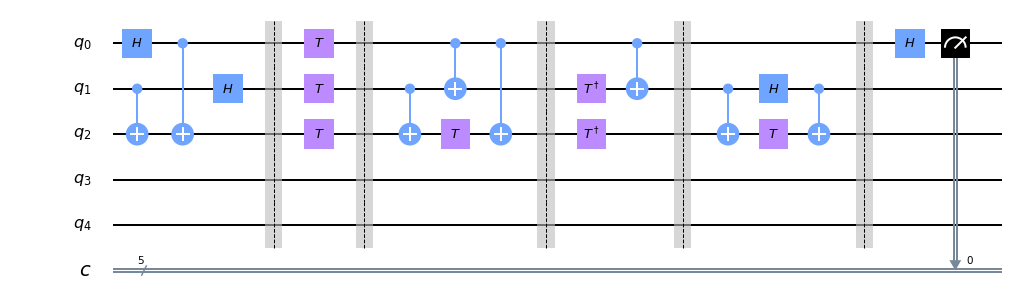

In [27]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister (5, 'c')
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[1])
qc.barrier()
for i in range(3):
    if (i<3): qc.t(qr[i])
    else: qc.tdg(qr[i])
        
qc.barrier()

qc.cx(qr[1],qr[2])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.cx(qr[0],qr[2])


qc.barrier() 

qc.tdg(qr[1])
qc.tdg(qr[2])
qc.cx(qr[0],qr[1])


qc.barrier()

qc.cx(qr[1],qr[2])
qc.h(qr[1])
qc.t(qr[2])
qc.cx(qr[1],qr[2])

qc.barrier()

qc.h(qr[0])
qc.measure(qr[0],cr[0])
qc.draw(output='mpl')